<a href="https://colab.research.google.com/github/biswajitmohanty/genai/blob/main/Multiple_I_O_in_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, [2, 3]]  # Selecting only petal width and petal length
y = iris.target  # Species: Setosa, Versicolor, Virginica

# One-hot encoding the output labels
y_one_hot = keras.utils.to_categorical(y, 3)  # 0 -> Setosa -> [1,0,0]
                                              # 1 -> Versicolor -> [0,1,0]
                                              # 2 -> Virginica -> [0,0,1]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Normalize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a Neural Network
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(2,)),  # 2 input features
    keras.layers.Dense(5, activation='relu'),  # Hidden layer
    keras.layers.Dense(3, activation='softmax')  # 3 outputs for 3 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=5, validation_data=(X_test, y_test))

# 150 samples
# 120 samples - training
# 5 samples are in each batch
# 120/5 = 24 batches
# 24 (120 samples) * 50 = 1200 updates of parameters

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.3086 - loss: 1.0322 - val_accuracy: 0.2667 - val_loss: 0.9919
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3866 - loss: 1.0046 - val_accuracy: 0.4000 - val_loss: 0.9494
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4379 - loss: 0.9460 - val_accuracy: 0.4333 - val_loss: 0.9067
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4145 - loss: 0.9155 - val_accuracy: 0.4667 - val_loss: 0.8628
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4791 - loss: 0.8635 - val_accuracy: 0.4667 - val_loss: 0.8158
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4681 - loss: 0.8481 - val_accuracy: 0.6667 - val_loss: 0.7688
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7916 - loss: 0.7739 - val_accuracy: 0.8000 - val_loss: 0.7179
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8309 - loss: 0.7070 - val_accuracy: 0.8000 - v

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


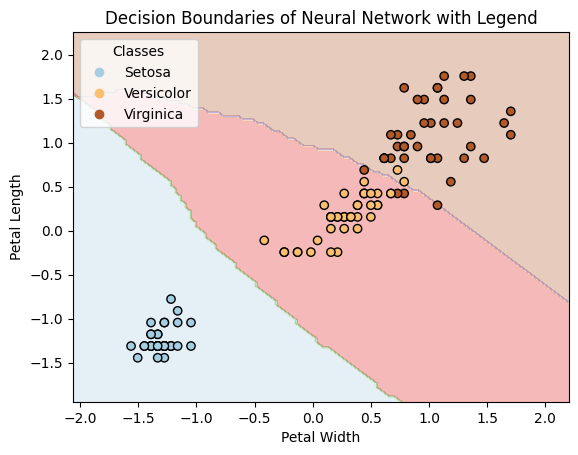

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot decision boundaries with legend
def plot_decision_boundary(X, y, model, class_names):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Predict class labels for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

    # Scatter plot of training data
    scatter = plt.scatter(X[:, 0], X[:, 1], c=np.argmax(y, axis=1), cmap=plt.cm.Paired, edgecolor='k')

    # Create legend
    handles, _ = scatter.legend_elements()
    plt.legend(handles, class_names, title="Classes")

    # Labels and title
    plt.xlabel('Petal Width')
    plt.ylabel('Petal Length')
    plt.title("Decision Boundaries of Neural Network with Legend")
    plt.show()

# Class names for legend
class_names = ["Setosa", "Versicolor", "Virginica"]

# Plot decision boundaries with legend
plot_decision_boundary(X_train, y_train, model, class_names)